<a href="https://colab.research.google.com/github/NeoZ666/classroom_DL_EXP/blob/main/DL_exp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("asad1m9a9h6mood/news-articles")

# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(r".csv"):
        csv_path = os.path.join(path, filename)
        break

# Read the CSV file using the corrected path, specifying the encoding
# Try 'latin-1' or 'ISO-8859-1' if 'utf-8' doesn't work
df = pd.read_csv(csv_path, encoding='latin-1')  # or encoding='ISO-8859-1'
print("Dataset shape:", df.shape)
print("Columns:", df.columns)

articles = df['Article'].values
labels = df['NewsType'].values

Dataset shape: (2692, 4)
Columns: Index(['Article', 'Date', 'Heading', 'NewsType'], dtype='object')


In [ ]:
df.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [ ]:

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
articles_train, articles_test, labels_train, labels_test = train_test_split(
    articles, encoded_labels, test_size=0.2, random_state=42
)

# Tokenize and pad sequences
max_words = 10000  # maximum number of words to keep in the vocabulary
max_len = 500  # maximum sequence length for each article

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(articles_train)
sequences_train = tokenizer.texts_to_sequences(articles_train)
sequences_test = tokenizer.texts_to_sequences(articles_test)

x_train = pad_sequences(sequences_train, maxlen=max_len)
x_test = pad_sequences(sequences_test, maxlen=max_len)

In [ ]:
import numpy as np

# Ensure x_train and x_test are converted to numpy arrays if they aren't already
x_train = np.array(x_train)
x_test = np.array(x_test)

print(f"x_train shape: {x_train.shape}")  # Should be (num_samples, max_len)
print(f"x_test shape: {x_test.shape}")


x_train shape: (2153, 500)
x_test shape: (539, 500)


In [ ]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(max_len,)),  # Define the input shape explicitly here
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 500, 64)             │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 500, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,326,689 (5.06 MB)

 Trainable params: 1,326,689 (5.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, labels_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 702ms/step - accuracy: 0.6461 - loss: 0.5783 - val_accuracy: 0.9675 - val_loss: 0.0858
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 660ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9629 - val_loss: 0.0851
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 630ms/step - accuracy: 0.9971 - loss: 0.0224 - val_accuracy: 0.9907 - val_loss: 0.0545
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 667ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9884 - val_loss: 0.0521
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 656ms/step - accuracy: 1.0000 - loss: 7.6158e-04 - val_accuracy: 0.9907 - val_loss: 0.0472
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 681ms/step - accuracy: 1.0000 - loss: 6.2155e-04 - val_accuracy: 0.9907 - val_loss: 0.0474
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 639ms/step - accuracy: 1.0000 - loss: 5.1910e-04 - val_accuracy: 0.9907 - val_loss: 0.0534
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 653ms/step - accuracy: 1.0000 - loss: 4.421

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, labels_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Make predictions and evaluate with metrics
y_pred = (model.predict(x_test) > 0.5).astype("int32")
accuracy = accuracy_score(labels_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9906 - loss: 0.0561
Test accuracy: 98.33%
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step
Test Accuracy: 98.33%


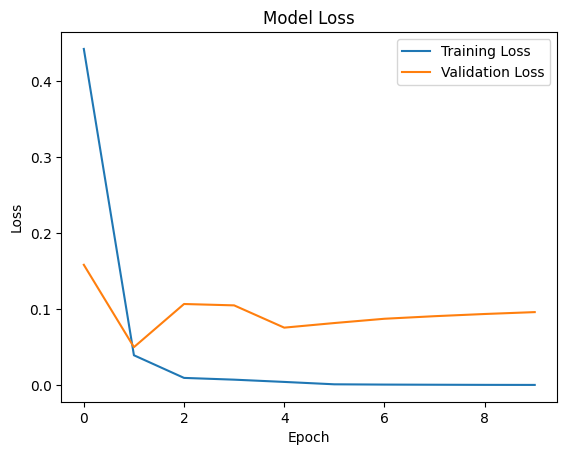

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
